In [0]:
#import all what we need
#based ot this dast ai lesson https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Now, you may access your Google Drive as a file sytem using standard python commands to both read and write files. 
#Don’t forget to add base_dir before root path(s) in all notebooks. For example, in lesson2-download.ipynb 5th cell, make the following changes:
#path = Path(base_dir + 'data/bears')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [0]:
from fastai.vision import *

In [0]:
folder = 't34'
file = 'urls_t34.csv'

In [0]:
folder = 'tiger'
file = 'urls_tiger.csv'

In [0]:
path =  Path(base_dir + 'data/t34')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path =  Path(base_dir + 'data/tiger')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/t34/urls_t34.csv')]

In [0]:
classes = ['t34','tiger']

In [0]:
download_images('/content/gdrive/My Drive/fastai-v3/data/t34/urls_t34.csv','/content/gdrive/My Drive/fastai-v3/data/t34', max_pics=200)

In [0]:
download_images('/content/gdrive/My Drive/fastai-v3/data/tiger/urls_tiger.csv','/content/gdrive/My Drive/fastai-v3/data/tiger', max_pics=200)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('/content/gdrive/My Drive/fastai-v3/data/', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['t34', 'tiger']

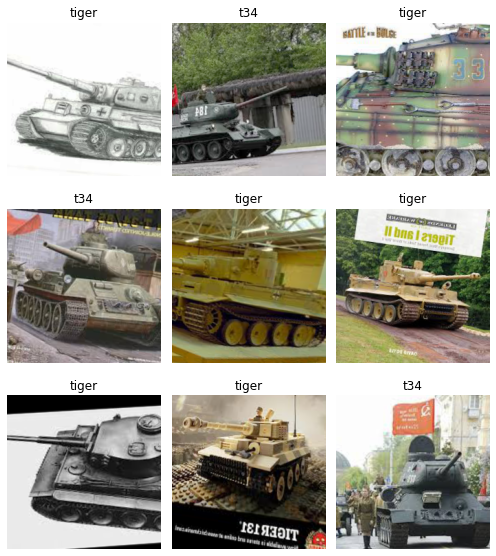

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['t34', 'tiger'], 2, 320, 80)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.937877,0.887711,0.350000,00:28
1,0.695061,0.504212,0.175000,00:05
2,0.555407,0.331990,0.100000,00:05
3,0.495815,0.298183,0.087500,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


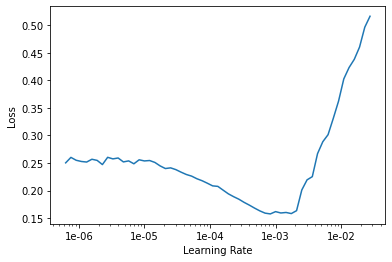

In [0]:
#plot learn rate
learn.recorder.plot()

In [0]:
#optimize model 
# error rate is only 7%
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.159777,0.384192,0.125000,00:06
1,0.160737,0.422002,0.075000,00:05


In [0]:
learn.save('stage-2')

In [0]:
#interpretation of model
interp = ClassificationInterpretation.from_learner(learn)

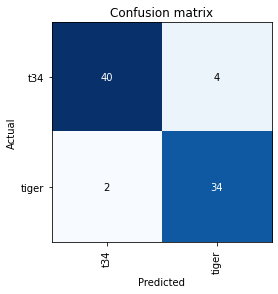

In [0]:
interp.plot_confusion_matrix()

In [0]:
#putting model in production
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
!pip3 install starlette

     |████████████████████████████████| 61kB 4.7MB/s 


In [0]:
!pip3 install uvicorn

     |████████████████████████████████| 51kB 3.3MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 3.9MB 16.1MB/s 
     |████████████████████████████████| 225kB 53.9MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 


In [0]:
from starlette.applications import Starlette
from starlette.responses import JSONResponse
from starlette.routing import Route


async def homepage(request):
    return JSONResponse({'hello': 'world'})


app = Starlette(debug=True, routes=[
    Route('/', homepage),
])

In [0]:
!uvicorn example:app

ERROR:    Error loading ASGI app. Could not import module "example".


In [0]:
learn = load_learner('/content/gdrive/My Drive/fastai-v3/data/')

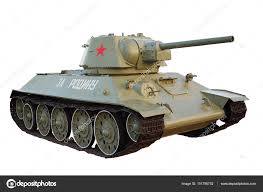

In [0]:
img = open_image('/content/gdrive/My Drive/fastai-v3/data/t34/00000199.jpg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)